## Trabajo Intruducción a Data Science

In [2]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import geopandas as gpd

In [3]:
ruta = "/Users/jacinta/Desktop/MIA/Introduccion a Data Science/Trabajo Grupo 8/"
estaciones = pd.read_csv(str(ruta)+'/Data/cr2_qflxDaily_2018_stations.txt', sep=",", decimal=".")

In [5]:
estaciones.head(2)

,codigo_estacion,institucion,fuente,nombre,altura,latitud,longitud,codigo_cuenca,nombre_cuenca,codigo_sub_cuenca,nombre_sub_cuenca,inicio_observaciones,fin_observaciones,cantidad_observaciones,inicio_automatica
0,1201005,DGA,dga_web,Rio Caracarani En Humapalca,3908,-17.8428,-69.6994,12,Rio Lluta,120,Rio Lluta Alto,1973-08-15,2018-01-30,15450,2017-04-13
1,1201002,DGA,dga_web,Rio Caracarani En Alcerreca,3253,-17.9833,-69.6283,12,Rio Lluta,120,Rio Lluta Alto,1961-12-13,1997-09-11,3375,-


In [6]:
estaciones_geo= gpd.GeoDataFrame(estaciones, 
                                 geometry=gpd.points_from_xy(estaciones.longitud, estaciones.latitud))

In [7]:
estaciones_geo.crs = 4326
estaciones_geo = estaciones_geo.to_crs(32719)

<AxesSubplot:>

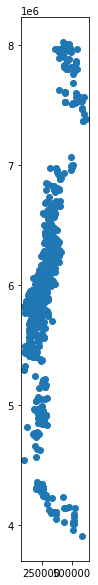

In [8]:
fig,ax=plt.subplots(1,1,figsize=(10,10))
estaciones_geo.plot(ax=ax)

In [ ]:
regiones = gpd.read_file(str(ruta)+'REGION/REGIONES_2020.shp')
comunas = gpd.read_file(str(ruta)+'COMUNA/COMUNAS_2020.shp')
print(comunas.crs)
comunas = comunas.to_crs(32719)
print(regiones.crs)
regiones = regiones.to_crs(32719)

In [14]:
print(regiones.head(2))
print(regiones.columns)
print(comunas.head(2))
print(comunas.columns)

  CUT_REG                                     REGION  SUPERFICIE  \
0      11  Aysén del General Carlos Ibáñez del Campo   106796.55   
1      07                                      Maule    30321.08   

                                            geometry  
0  MULTIPOLYGON (((8805.897 4585540.850, 8800.510...  
1  POLYGON ((310305.410 5973918.151, 310261.534 5...  
Index(['CUT_REG', 'REGION', 'SUPERFICIE', 'geometry'], dtype='object')
  CUT_REG CUT_PROV CUT_COM    REGION PROVINCIA         COMUNA  SUPERFICIE  \
0      01      011   01101  Tarapacá   Iquique        Iquique     2289.53   
1      01      011   01107  Tarapacá   Iquique  Alto Hospicio      571.19   

                                            geometry  
0  MULTIPOLYGON (((384222.749 7657754.145, 384210...  
1  POLYGON ((403282.918 7760582.767, 398985.088 7...  
Index(['CUT_REG', 'CUT_PROV', 'CUT_COM', 'REGION', 'PROVINCIA', 'COMUNA',
       'SUPERFICIE', 'geometry'],
      dtype='object')


In [16]:
regiones['REGION'].value_counts()

Aysén del General Carlos Ibáñez del Campo    1
Maule                                        1
Antofagasta                                  1
La Araucanía                                 1
Magallanes y de la Antártica Chilena         1
Libertador General Bernardo O'Higgins        1
Atacama                                      1
Valparaíso                                   1
Los Lagos                                    1
Biobío                                       1
Tarapacá                                     1
Metropolitana de Santiago                    1
Los Ríos                                     1
Arica y Parinacota                           1
Ñuble                                        1
Coquimbo                                     1
Name: REGION, dtype: int64

In [10]:
print(comunas.crs)
comunas = comunas.to_crs(32719)

epsg:32719


Text(0.5, 1.0, 'Estaciones a lo largo de Chile')

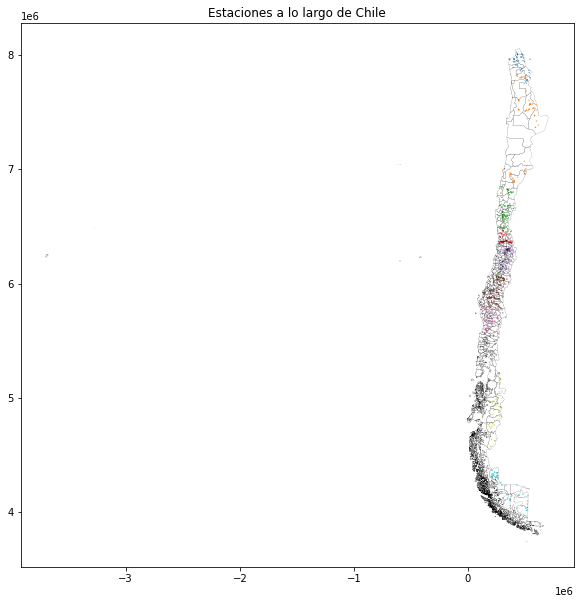

In [11]:
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)

comunas.boundary.plot(ax=ax,lw=0.1,color='k')
estaciones_geo.plot(ax=ax, markersize=0.1,column='codigo_cuenca',categorical=True)
ax.set_title('Estaciones a lo largo de Chile')

Text(0.5, 1.0, 'Estaciones a lo largo de Chile')

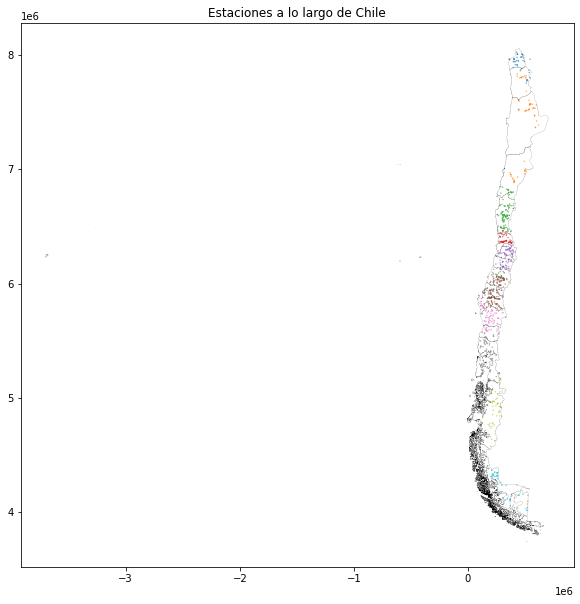

In [12]:
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)

regiones.boundary.plot(ax=ax,lw=0.1,color='k')
estaciones_geo.plot(ax=ax, markersize=0.1,column='codigo_cuenca',categorical=True)
ax.set_title('Estaciones a lo largo de Chile')

### Estaciones en la Región Metropolitana

In [ ]:
comunas_rm = comunas.loc[comunas['REGION']=='Metropolitana de Santiago']

<AxesSubplot:>

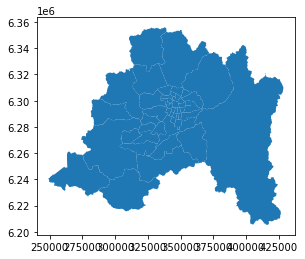

In [19]:
comunas_rm.plot()

In [34]:
print(comunas_rm.crs, estaciones_geo.crs)
estaciones_rm = gpd.overlay(comunas_rm, estaciones_geo, 
                            how='intersection', keep_geom_type=False)

epsg:32719 epsg:32719


Text(0.5, 1.0, 'Estaciones a lo largo de Chile - Distinguiendo por Sub cuencas')

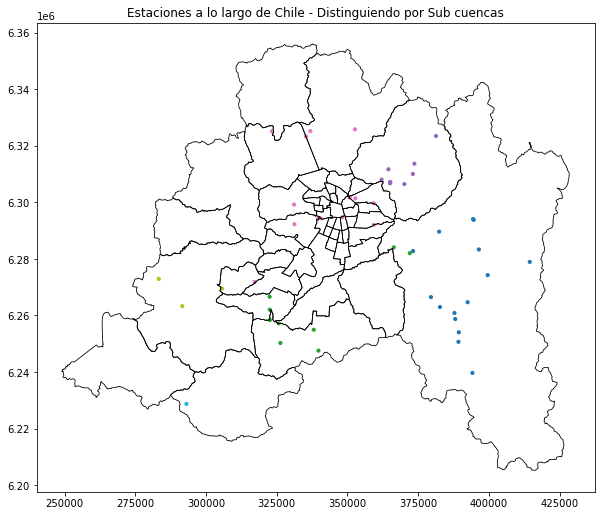

In [41]:
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)

comunas_rm.boundary.plot(ax=ax,lw=0.8,color='k')
estaciones_rm.plot(ax=ax, markersize=10,column='codigo_sub_cuenca',categorical=True)
ax.set_title('Estaciones a lo largo de Chile - Distinguiendo por Sub cuencas')